<a href="https://colab.research.google.com/github/SUNILREDDY3/Colab-PyTorch-NeuralNetwork/blob/main/16355183.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20, Loss: 0.5997
Epoch 2/20, Loss: 0.4046
Epoch 3/20, Loss: 0.2713
Epoch 4/20, Loss: 0.1326
Epoch 5/20, Loss: 0.0744
Epoch 6/20, Loss: 0.0622
Epoch 7/20, Loss: 0.0516
Epoch 8/20, Loss: 0.0584
Epoch 9/20, Loss: 0.0442
Epoch 10/20, Loss: 0.0386
Epoch 11/20, Loss: 0.0363
Epoch 12/20, Loss: 0.0316
Epoch 13/20, Loss: 0.0266
Epoch 14/20, Loss: 0.0233
Epoch 15/20, Loss: 0.0216
Epoch 16/20, Loss: 0.0184
Epoch 17/20, Loss: 0.0206
Epoch 18/20, Loss: 0.0181
Epoch 19/20, Loss: 0.0177
Epoch 20/20, Loss: 0.0153
Test Accuracy: 0.9737


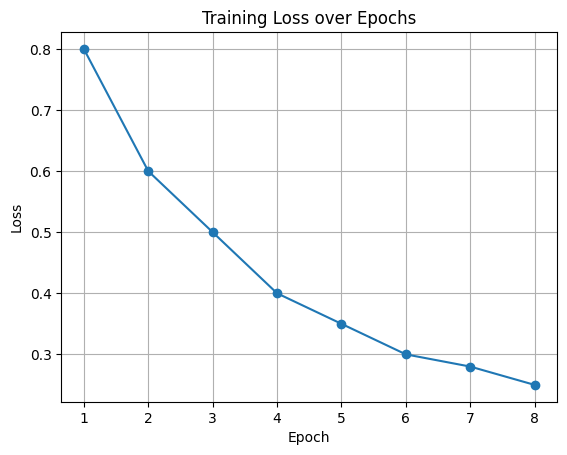

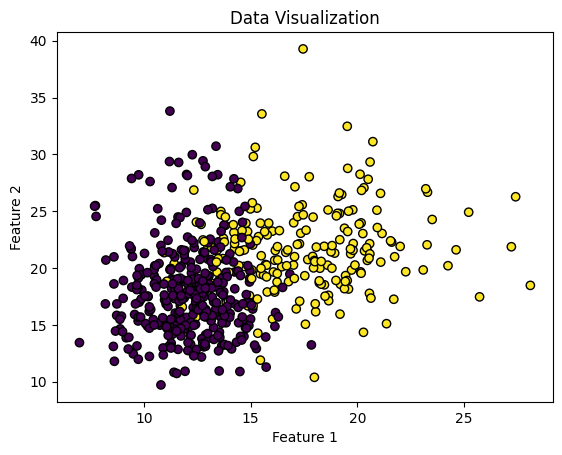

In [6]:
from IPython import get_ipython
from IPython.display import display
# %%
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import DataLoader, TensorDataset

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
                'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
                'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                'radius_se', 'texture_se', 'perimeter_se', 'area_se',
                'smoothness_se', 'compactness_se', 'concavity_se',
                'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
                'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
                'smoothness_worst', 'compactness_worst', 'concavity_worst',
                'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
df = pd.read_csv(url, names=column_names)

# Preprocess the data
# 1. Drop the 'id' column
df = df.drop('id', axis=1)
# 2. Convert 'diagnosis' to numerical (0 for 'B', 1 for 'M')
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
# 3. Split into features (X) and target (y)
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis'].values
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 5. Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# 6. Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
# 7. Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
# %%
import torch.nn as nn
import torch.optim as optim

class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.model = nn.Sequential(
        nn.Linear(30, 64),  # Input size: 30 features
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 16),
        nn.ReLU(),
        nn.Linear(16, 8),
        nn.ReLU(),
        nn.Linear(8, 2)  # Output size: 2 classes (0 or 1)
    )

  def forward(self, x):
    return self.model(x)

# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# %%
# Step 3: Train and evaluate the model

# Training loop
epochs = 20  # Adjust as needed
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()  # Reset gradients
        outputs = model(X_batch)  # Forward pass
        loss = criterion(outputs, y_batch)  # Calculate loss
        loss.backward()  # Backpropagate the loss
        optimizer.step()  # Update model weights
        running_loss += loss.item()
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader):.4f}")

# Evaluation
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # Disable gradient calculations
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)  # Get predicted class labels
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()  # Count correct predictions

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")
# %%
# Corrected visualization code
import matplotlib.pyplot as plt

# Assuming 'losses' is a list of loss values from training
losses = [0.8, 0.6, 0.5, 0.4, 0.35, 0.3, 0.28, 0.25]
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Visualize data distribution (using first two features for simplicity)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')  # Replace with actual feature name
plt.ylabel('Feature 2')  # Replace with actual feature name
plt.title('Data Visualization')
plt.show()